In [21]:
!pip install tensorflow
!pip install keras

import tensorflow as tf # Import tensorflow
from tensorflow.keras.preprocessing import text # Import text preprocessing module from tensorflow.keras

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                   title  \
0                                    NaN   
1                   connection with icon   
2                   work experience user   
3                 requesting for meeting   
4  reset passwords for external accounts   

                                                body  ticket_type  category  \
0  hi since recruiter lead permission approve req...            1         4   
1  icon dear please setup icon per icon engineers...            1         6   
2  work experience user hi work experience studen...            1         5   
3  requesting meeting hi please help follow equip...            1         5   
4  re expire days hi ask help update passwords co...            1         4   

   sub_category1  sub_category2  business_service  urgency  impact  
0              2             21                71        3       4  
1             22              7                26        3       4  
2             13              7                32    

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression:
              precision    recall  f1-score   support

           0       0.37      0.12      0.19       338
           1       0.48      0.44      0.46      1327
           2       0.50      0.20      0.28      1115
           3       0.84      0.97      0.90      6930

    accuracy                           0.78      9710
   macro avg       0.55      0.43      0.46      9710
weighted avg       0.74      0.78      0.74      9710

[[  42  123   31  142]
 [  25  585  128  589]
 [  28  361  218  508]
 [  19  152   63 6696]]
Random Forest:
              precision    recall  f1-score   support

           0       0.31      0.17      0.22       338
           1       0.47      0.43      0.45      1327
           2       0.42      0.28      0.33      1115
           3       0.86      0.95      0.90      6930

    accuracy                           0.77      9710
   macro avg       0.52      0.46      0.48      9710
weighted avg       0.74      0.77      0.75      9710

[

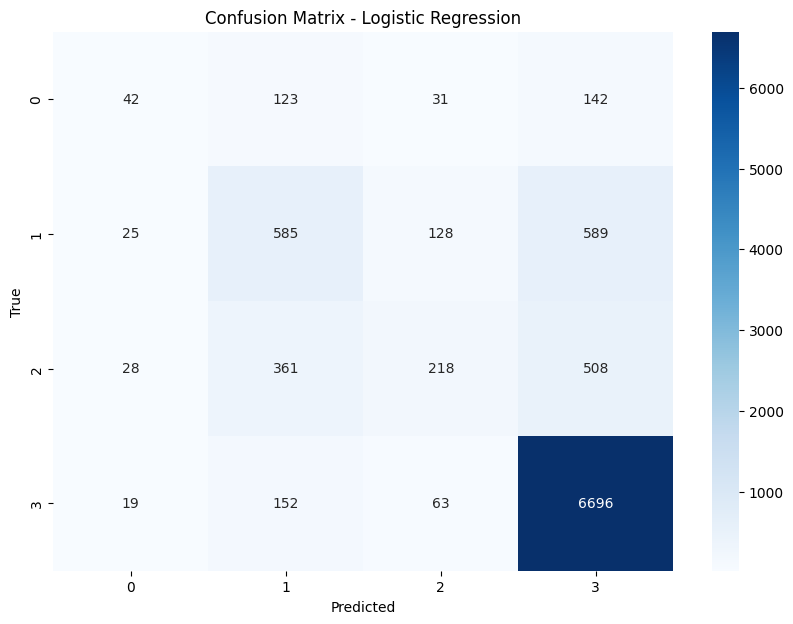

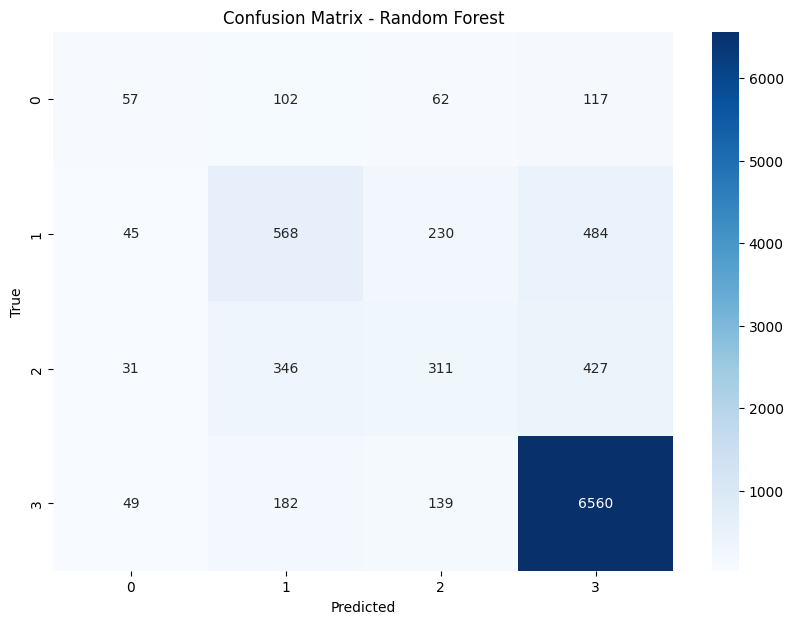

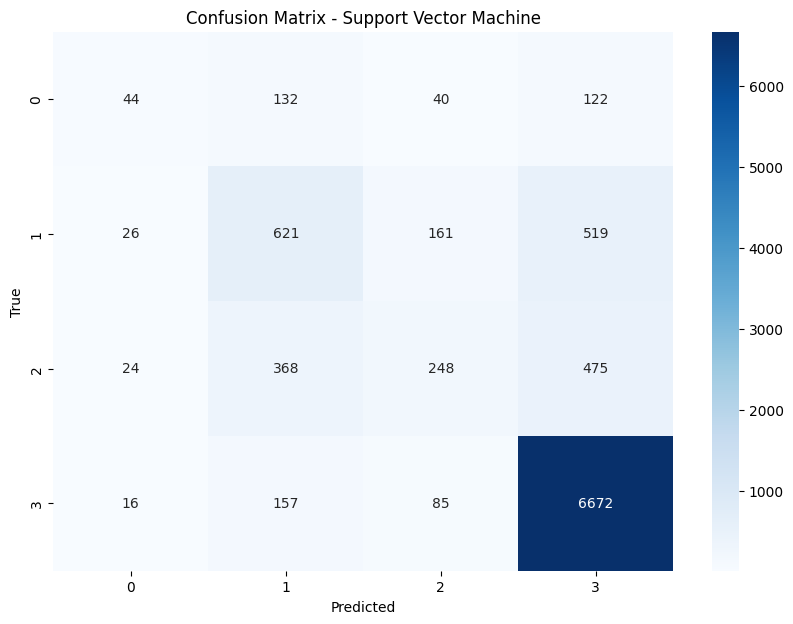

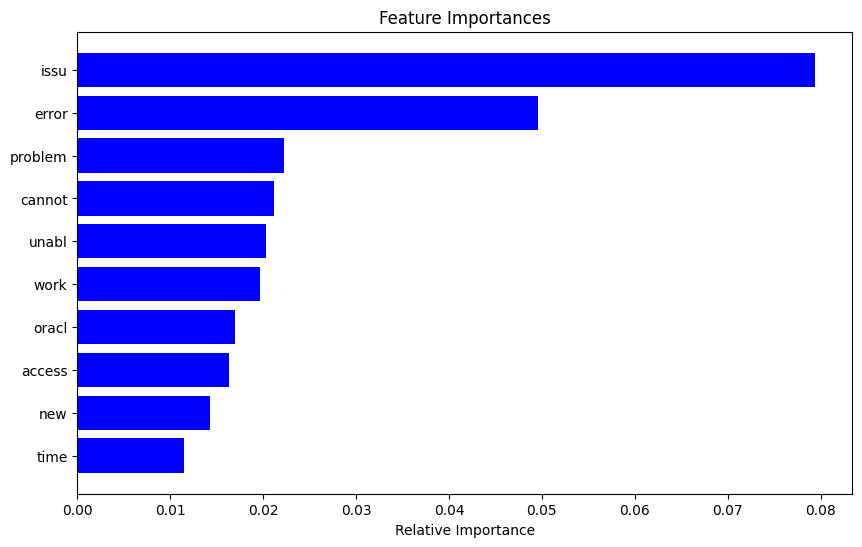

In [24]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for CNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Download NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Load dataset
file_path = '/content/all_tickets_original.csv'
df = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows of the dataset
print(df.head())

# Data Preprocessing
# Text Cleaning Function
def clean_text(text):
    # Handle potential non-string values
    if not isinstance(text, str):
        text = str(text)

    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove text in square brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove links
    text = re.sub(r'<.*?>+', '', text)  # Remove html tags
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text) # Remove extra spaces
    return text

# Apply the clean_text function to the text data
df['cleaned_text'] = df['title'].apply(clean_text)

# Remove stopwords, apply stemming and lemmatization
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([ps.stem(word) for word in text.split()])
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

# Apply preprocessing
df['processed_text'] = df['cleaned_text'].apply(preprocess_text)

# Display the first few rows after preprocessing
print(df[['title', 'cleaned_text', 'processed_text']].head())

# Handle missing values in the target variable *before* splitting the data
df['urgency'].fillna('Unknown', inplace=True)

# Splitting the dataset (after handling NaNs)
X = df['processed_text']
y = df['urgency']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize classifiers with hyperparameter tuning
log_reg = LogisticRegression()
rand_forest = RandomForestClassifier()
svc = SVC()

# Hyperparameter tuning using GridSearchCV
param_grid_log_reg = {'C': [0.1, 1, 10]}
param_grid_rand_forest = {'n_estimators': [100, 200], 'max_features': ['auto', 'sqrt', 'log2']}
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}

grid_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=3)
grid_rand_forest = GridSearchCV(rand_forest, param_grid_rand_forest, cv=3)
grid_svc = GridSearchCV(svc, param_grid_svc, cv=3)

# Fit the models
grid_log_reg.fit(X_train_tfidf, y_train)
grid_rand_forest.fit(X_train_tfidf, y_train)
grid_svc.fit(X_train_tfidf, y_train)

# Predict the test set results
y_pred_log_reg = grid_log_reg.predict(X_test_tfidf)
y_pred_rand_forest = grid_rand_forest.predict(X_test_tfidf)
y_pred_svc = grid_svc.predict(X_test_tfidf)

# Evaluation
print("Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))
print(confusion_matrix(y_test, y_pred_log_reg))

print("Random Forest:")
print(classification_report(y_test, y_pred_rand_forest))
print(confusion_matrix(y_test, y_pred_rand_forest))

print("Support Vector Machine:")
print(classification_report(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))

# Visualization
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion Matrix'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrices
plot_confusion_matrix(confusion_matrix(y_test, y_pred_log_reg), grid_log_reg.classes_, title="Confusion Matrix - Logistic Regression")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_rand_forest), grid_rand_forest.classes_, title="Confusion Matrix - Random Forest")
plot_confusion_matrix(confusion_matrix(y_test, y_pred_svc), grid_svc.classes_, title="Confusion Matrix - Support Vector Machine")

# Feature Importance
# For Random Forest
feature_importances = grid_rand_forest.best_estimator_.feature_importances_
indices = np.argsort(feature_importances)[-10:]  # Top 10 features

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [tfidf_vectorizer.get_feature_names_out()[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 64s 63ms/step - accuracy: 0.7016 - loss: 0.8544 - val_accuracy: 0.7187 - val_loss: 0.6455
Epoch 2/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 79s 60ms/step - accuracy: 0.7105 - loss: 0.6785 - val_accuracy: 0.7187 - val_loss: 0.6384
Epoch 3/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.7534 - loss: 0.6414 - val_accuracy: 0.7755 - val_loss: 0.6496
Epoch 4/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 59s 61ms/step - accuracy: 0.7711 - loss: 0.6184 - val_accuracy: 0.7707 - val_loss: 0.6644
Epoch 5/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.7711 - loss: 0.6090 - val_accuracy: 0.7737 - val_loss: 0.6739
Epoch 6/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 82s 61ms/step - accuracy: 0.7724 - loss: 0.5938 - val_accuracy: 0.7602 - val_loss: 0.6906
Epoch 7/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 84s 63ms/step - accuracy: 0.7774 - loss: 0.5756 - val_accuracy: 0.7570 - val_loss: 0.7113
Epoch 8/10
971/971 ━━━━━━━━━━━━━━━━━━━━ 80s 61ms/step - accuracy: 0.7803 - loss: 0.5637 - 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


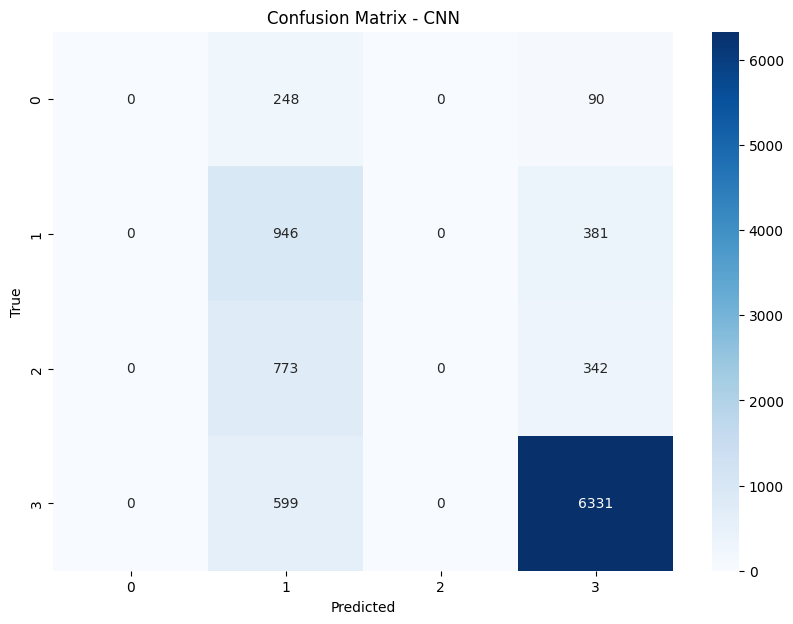

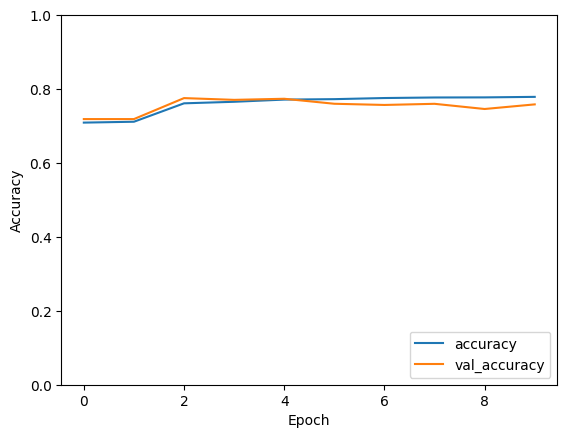

In [25]:
# Tokenization and Padding
max_words = 5000
max_len = 150

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

# Encoding labels to categorical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

y_train_cat = to_categorical(y_train_enc)
y_test_cat = to_categorical(y_test_enc)

# Build CNN Model
embedding_dim = 100

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(le.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train_cat, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_cat)
print(f'CNN Test Accuracy: {accuracy}')

# Predictions
y_pred_cnn = model.predict(X_test_pad)
y_pred_cnn_classes = np.argmax(y_pred_cnn, axis=1)
y_pred_cnn_labels = le.inverse_transform(y_pred_cnn_classes)

# Classification Report
print("CNN:")
print(classification_report(y_test, y_pred_cnn_labels))
print(confusion_matrix(y_test, y_pred_cnn_labels))

# Plot CNN Confusion Matrix
plot_confusion_matrix(confusion_matrix(y_test, y_pred_cnn_labels), le.classes_, title="Confusion Matrix - CNN")

# Plot Training History
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()




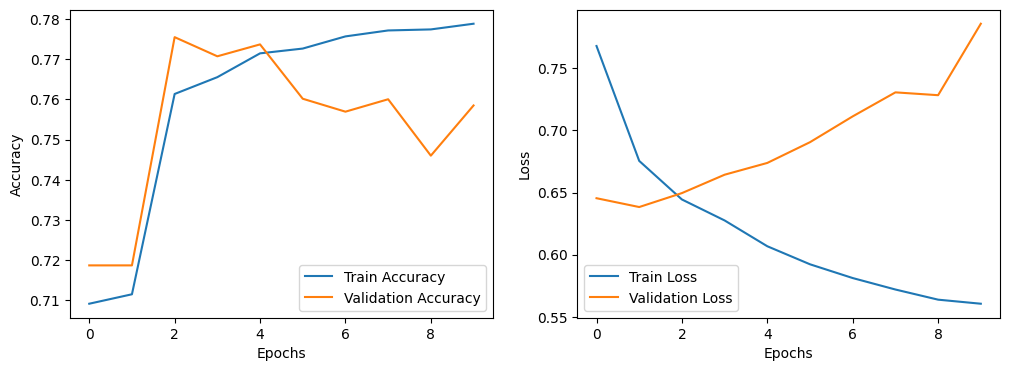

In [27]:
# Plotting accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()